# Time Series Analysis on the stars that left the cluster

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
os.chdir('/home/ninaad/cs-5thsem/data-analytics-for-star-cluster-simulations')

In [2]:
df1=pd.read_csv("Dataset/c_0000.csv")
df2=pd.read_csv("Dataset/c_0100.csv")
df3=pd.read_csv("Dataset/c_0200.csv")
df4=pd.read_csv("Dataset/c_0300.csv")
df5=pd.read_csv("Dataset/c_0400.csv")
df6=pd.read_csv("Dataset/c_0500.csv")
df7=pd.read_csv("Dataset/c_0600.csv")
df8=pd.read_csv("Dataset/c_0700.csv")
df9=pd.read_csv("Dataset/c_0800.csv")
df10=pd.read_csv("Dataset/c_0900.csv")
df11=pd.read_csv("Dataset/c_1000.csv")
df12=pd.read_csv("Dataset/c_1100.csv")
df13=pd.read_csv("Dataset/c_1200.csv")
df14=pd.read_csv("Dataset/c_1300.csv")
df15=pd.read_csv("Dataset/c_1400.csv")
df16=pd.read_csv("Dataset/c_1500.csv")
df17=pd.read_csv("Dataset/c_1600.csv")
df18=pd.read_csv("Dataset/c_1700.csv")
df19=pd.read_csv("Dataset/c_1800.csv")

In [3]:
id1=set(list(df1['id']))
id19=set(list(df19['id']))

In [4]:
stars_that_left=id1.difference(id19)# the final dataset does not have 64000 points because they left the cluster

In [5]:
stars_that_left=list(stars_that_left)
rows=[]
for i in range(19):
    rows.append([])
df_all=pd.DataFrame()
df_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19]
for i in range(len(df_list)):
    df_list[i]['date']=i+1
df1
for i in df_list:
    df_all=df_all.append(i)


In [6]:
#df_all

In [7]:
all_points=dict()
for i in stars_that_left:
    all_points[i]=df_all[df_all.iloc[:,7]==i]


In [8]:
#all_points[stars_that_left[0]]
# Run the cells if you want to see the data for one star that leaves the cluster with different date

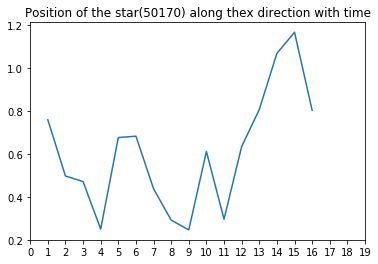

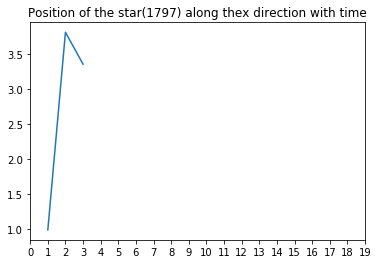

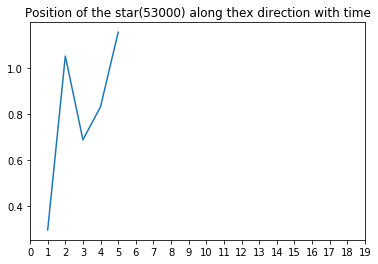

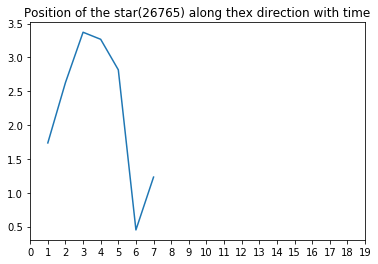

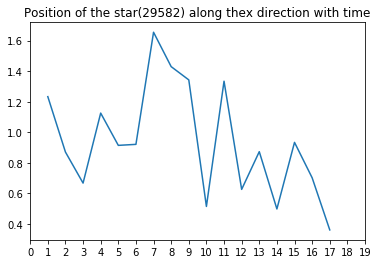

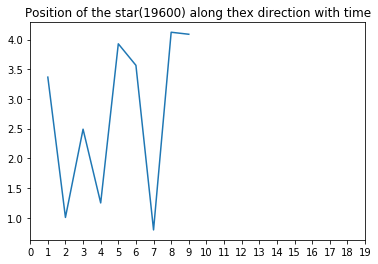

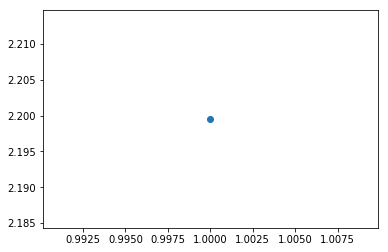

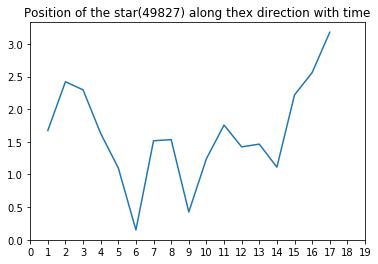

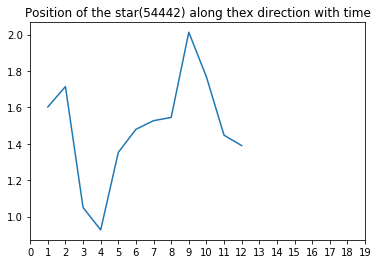

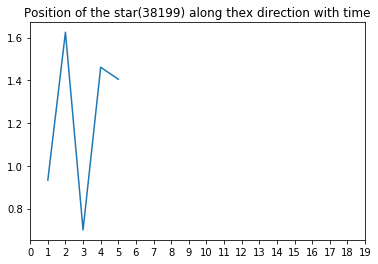

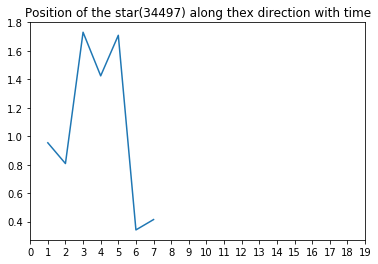

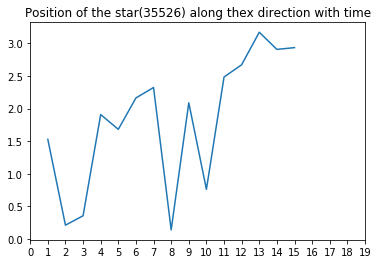

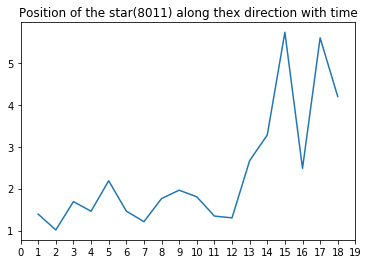

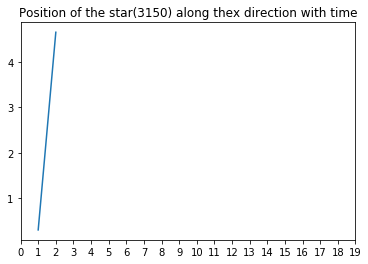

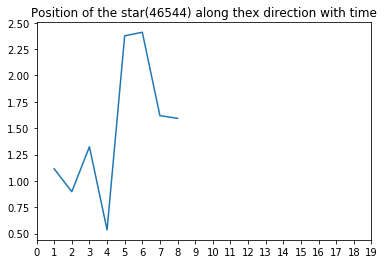

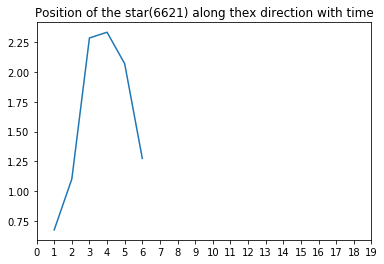

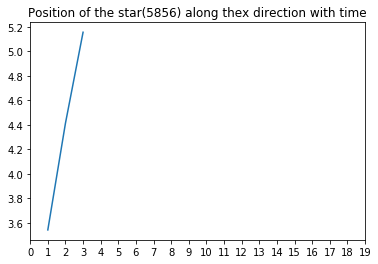

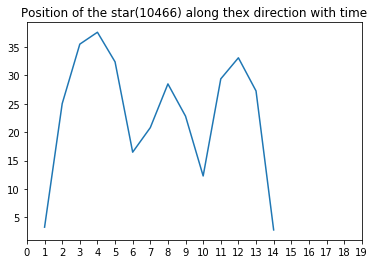

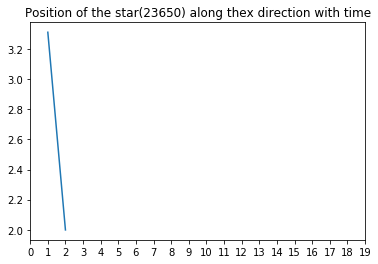

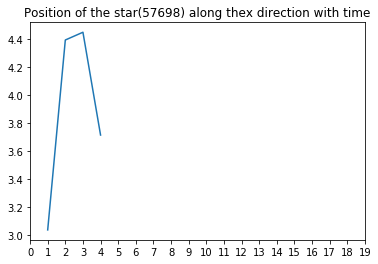

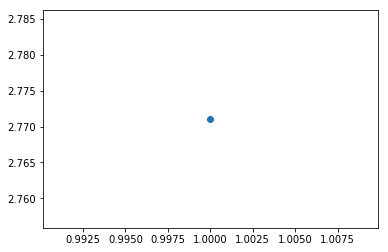

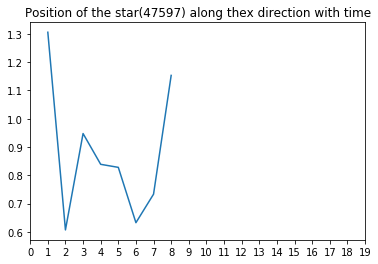

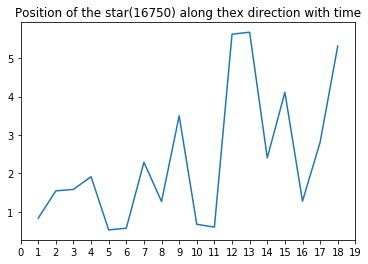

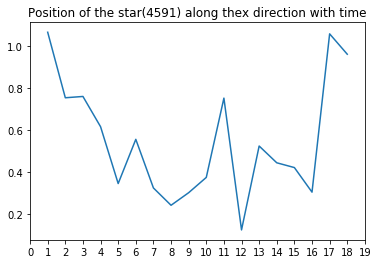

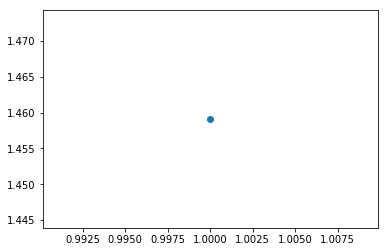

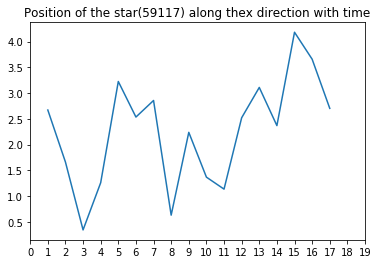

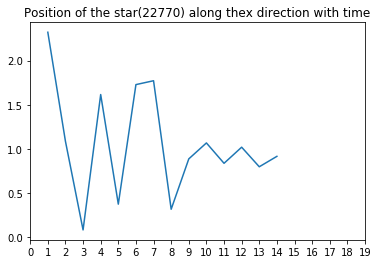

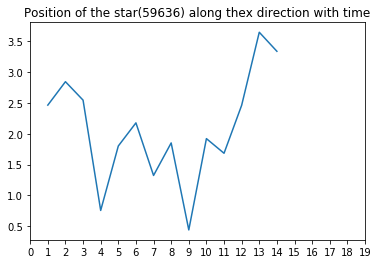

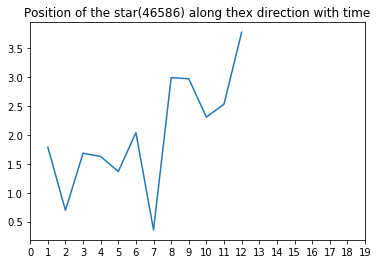

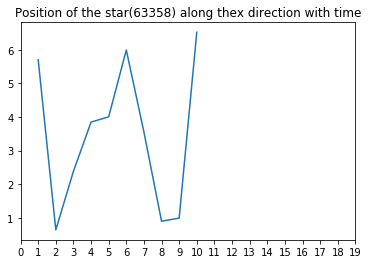

In [9]:
def plot_graph(x_coordinates,y_coordinates,i,j):
    if(len(x_coordinates)==1):
        plt.scatter(x_coordinates,y_coordinates)
        plt.show()
    else:
        plt.plot(x_coordinates,y_coordinates)
        plt.title('Position of the star('+str(i)+') along the'+str(j)+' direction with time')
        plt.xticks([i for i in range(20)])
        plt.show()
for i in all_points:
    y_coordinates=list(((all_points[i]['x']**2+all_points[i]['y']**2+all_points[i]['z']**2)**0.5))
    x_coordinates=list(all_points[i]['date'])
    #print(x_coordinates,y_coordinates)
    plot_graph(x_coordinates,y_coordinates,i,'x')

In [10]:
from statsmodels.tsa.stattools import adfuller
for i in all_points:
    y_coordinates=list(((all_points[i]['x']**2+all_points[i]['y']**2+all_points[i]['z']**2)**0.5))
    x_coordinates=list(all_points[i]['date'])
    if(len(y_coordinates)>9):
        result = adfuller(y_coordinates)
        print('Star id: ',i)
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))
        print('\n\n\n')

Star id:  50170
ADF Statistic: -0.377808
p-value: 0.913739
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772




Star id:  29582
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772




Star id:  49827
ADF Statistic: 0.000000
p-value: 0.958532
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803




Star id:  54442
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -10.417
	5%: -5.778
	10%: -3.392




Star id:  35526
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844




Star id:  8011
ADF Statistic: 0.000000
p-value: 0.958532
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772




Star id:  10466
ADF Statistic: -1.528819
p-value: 0.519210
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803




Star id:  16750
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772




Star id:  4591
ADF Statistic: -0.000000
p-value: 0.958532
Critical

/home/ninaad/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


#### The Augmented Dickey Fuller Test Values for most of the stars considered has a p value > 0.05. Therefore we cannot say whether the position is stationary

## Trying to Smoothen the data by first order differencing 

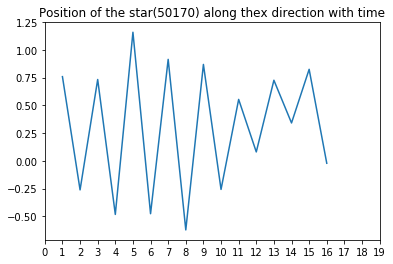

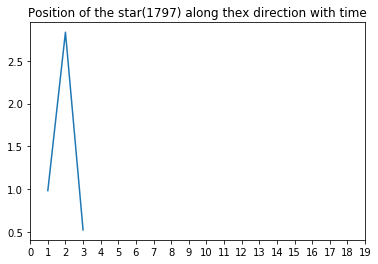

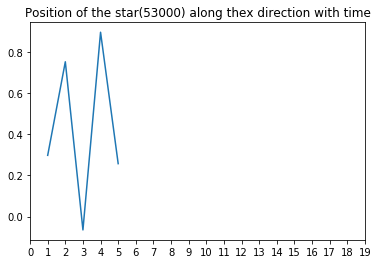

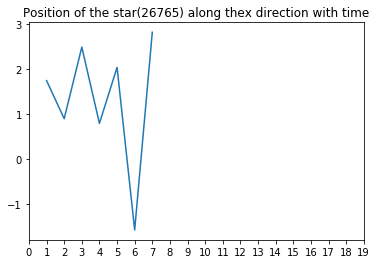

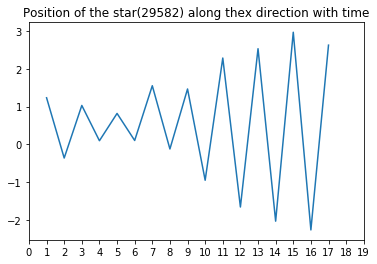

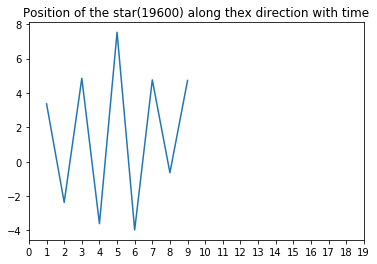

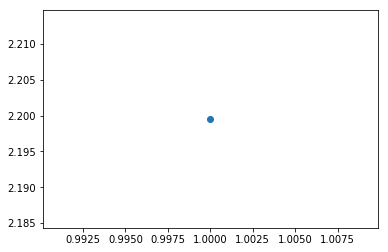

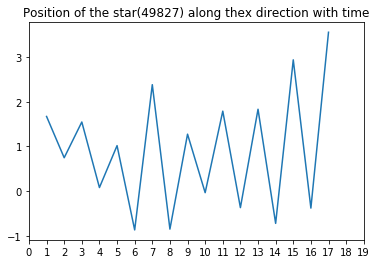

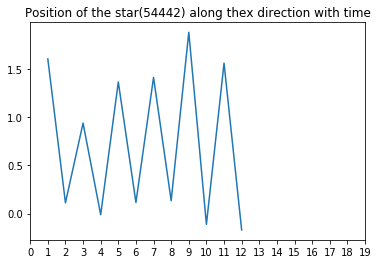

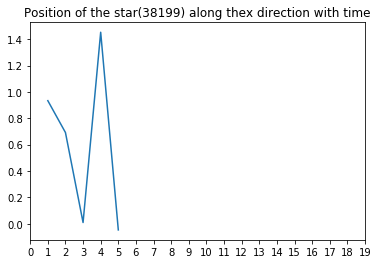

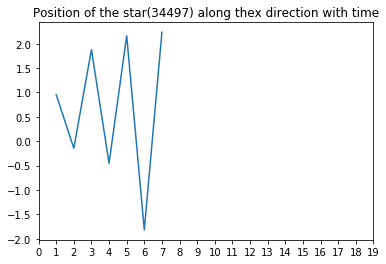

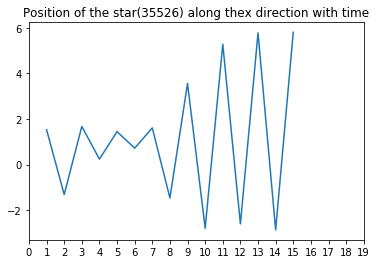

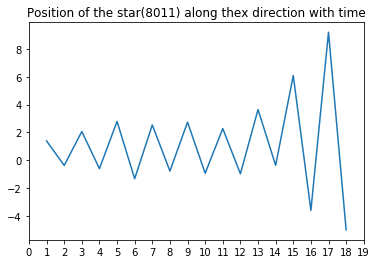

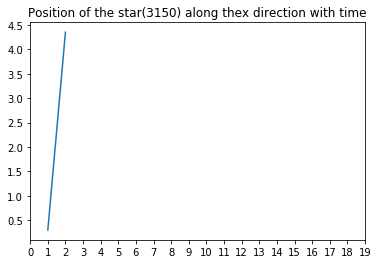

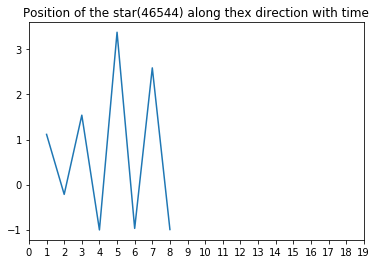

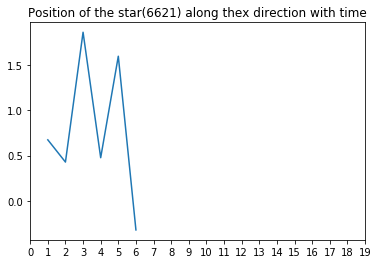

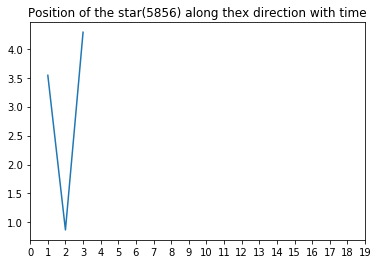

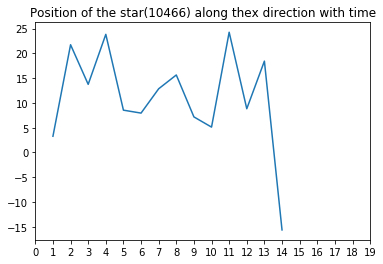

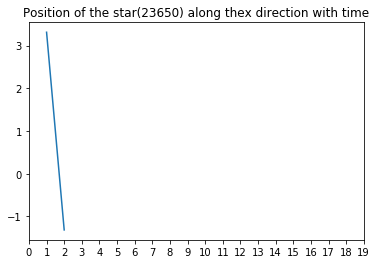

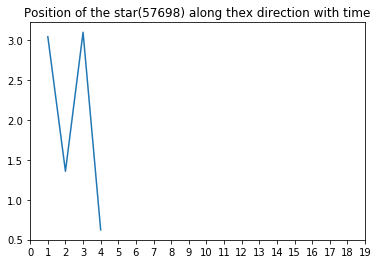

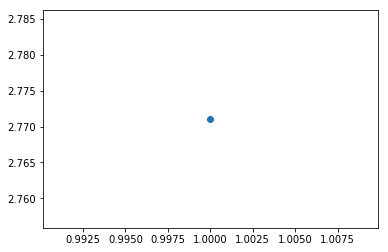

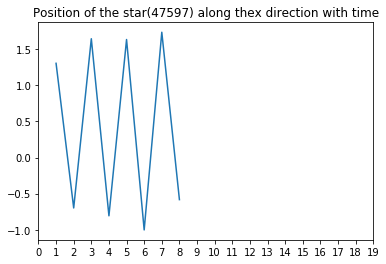

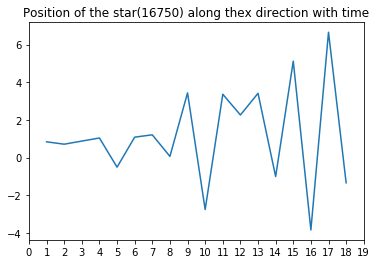

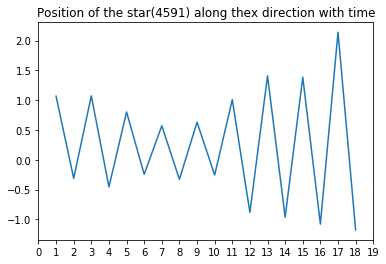

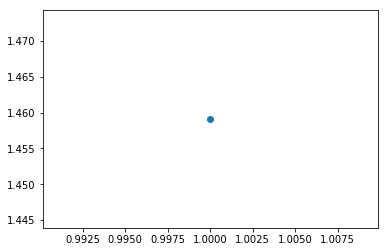

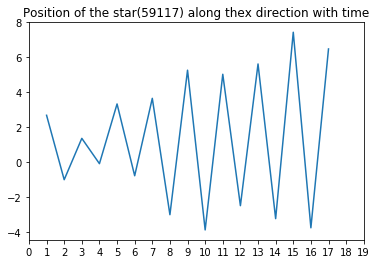

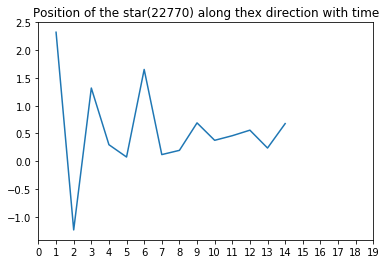

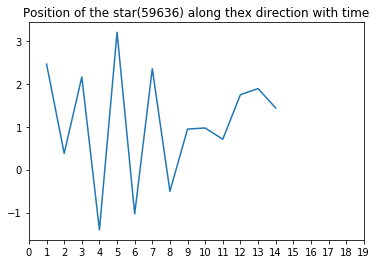

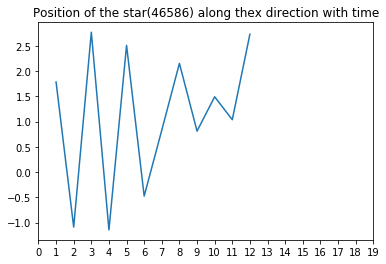

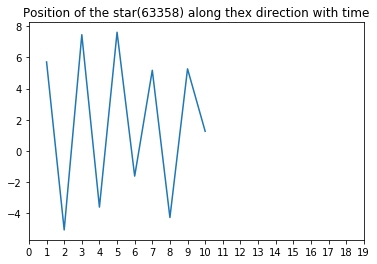

In [11]:
def differencing(y):
    new=[]
    new.append(y[0])
    for i in range(1,len(y)):
        new.append(y[i]-new[i-1])
    return new

for i in all_points:
    y_coordinates=list(((all_points[i]['x']**2+all_points[i]['y']**2+all_points[i]['z']**2)**0.5))
    x_coordinates=list(all_points[i]['date'])
    y_coordinates=differencing(y_coordinates)
    #print(x_coordinates,y_coordinates)
    plot_graph(x_coordinates,y_coordinates,i,'x')

## Double Differencing

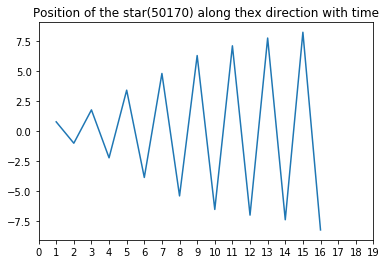

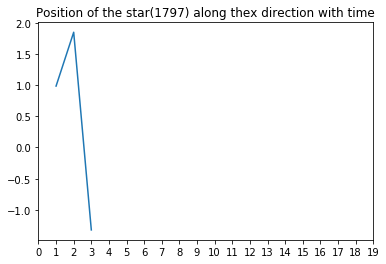

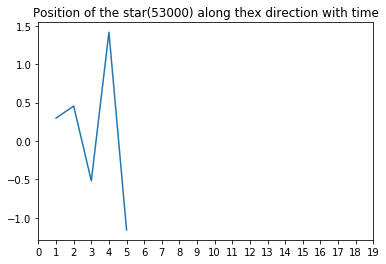

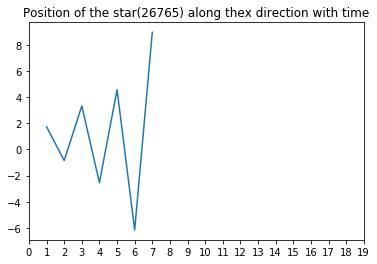

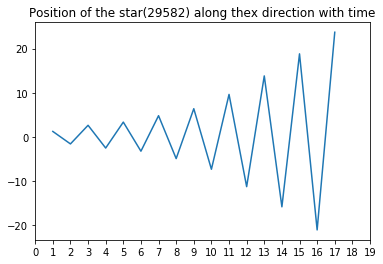

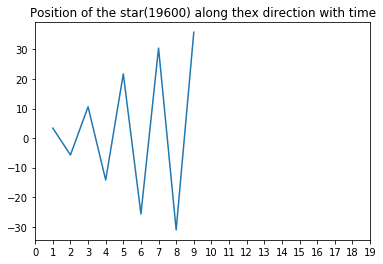

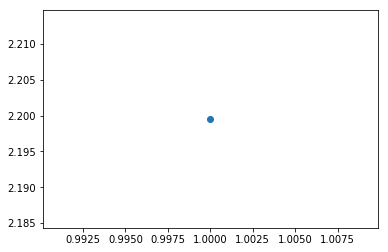

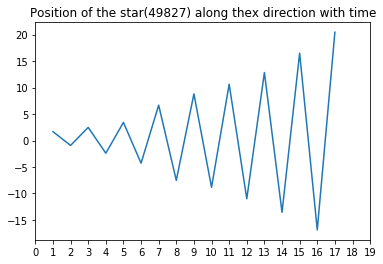

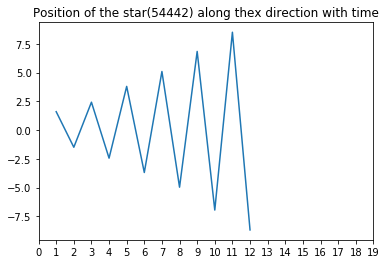

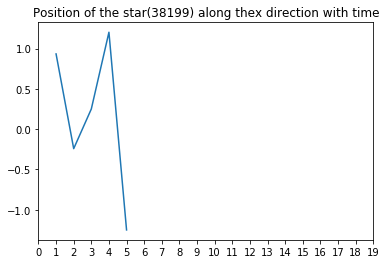

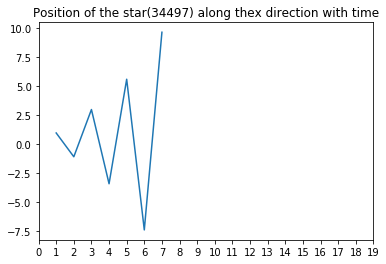

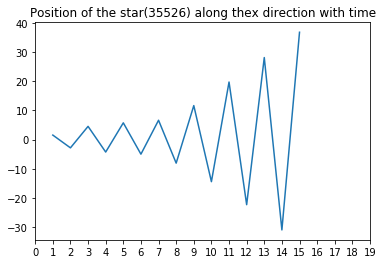

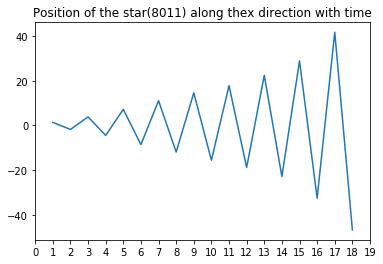

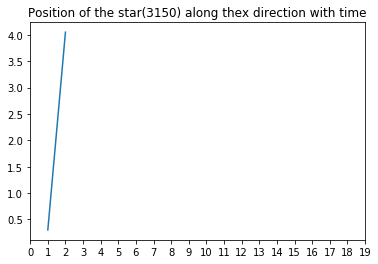

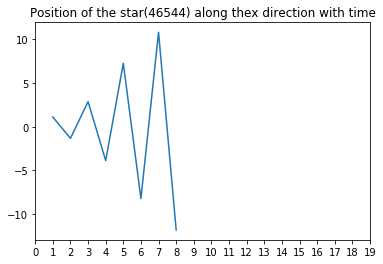

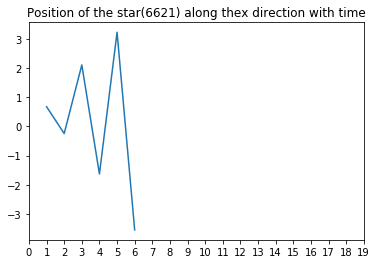

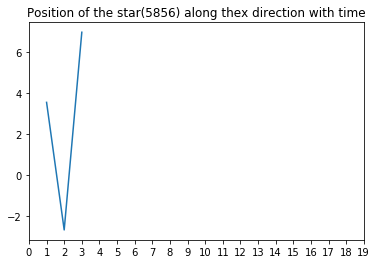

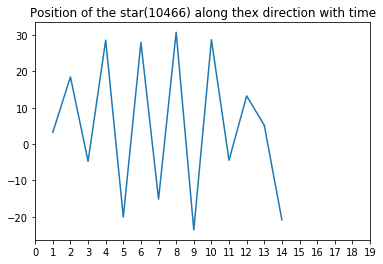

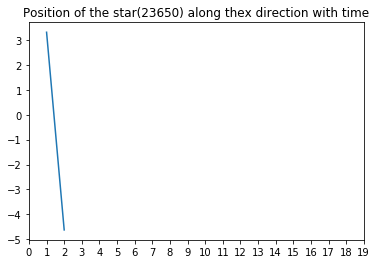

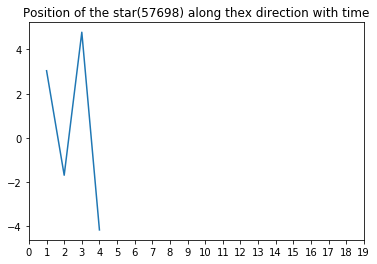

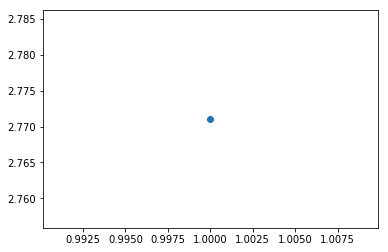

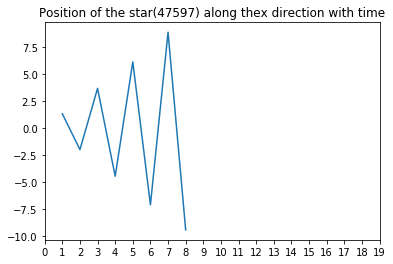

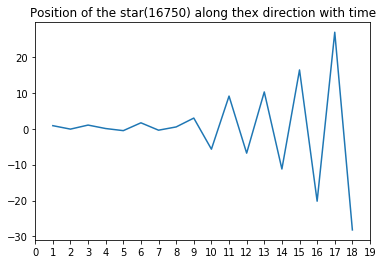

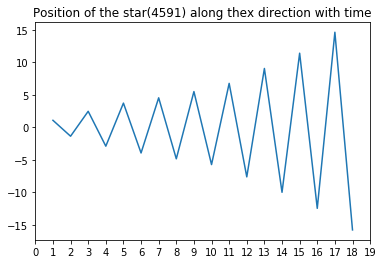

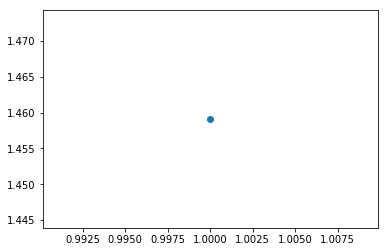

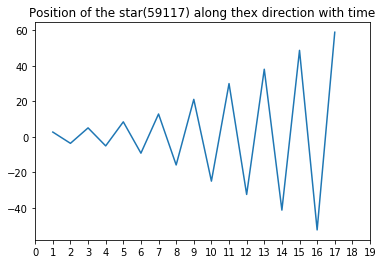

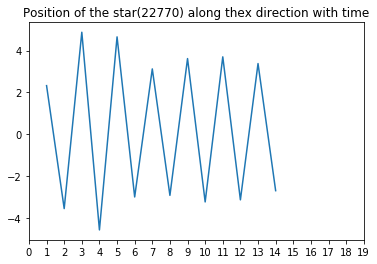

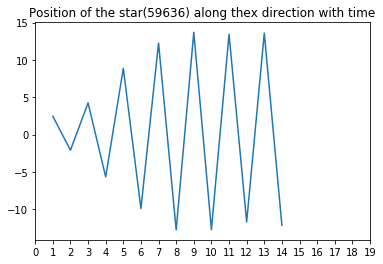

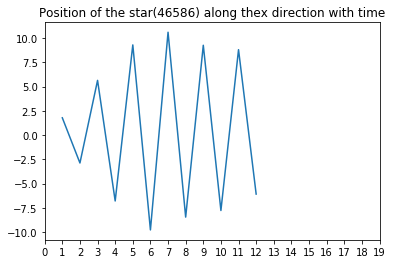

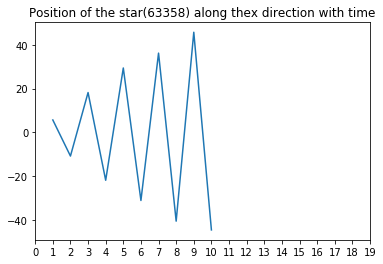

In [12]:
for i in all_points:
    y_coordinates=list(((all_points[i]['x']**2+all_points[i]['y']**2+all_points[i]['z']**2)**0.5))
    x_coordinates=list(all_points[i]['date'])
    y_coordinates=differencing(differencing(y_coordinates))
    #print(x_coordinates,y_coordinates)
    plot_graph(x_coordinates,y_coordinates,i,'x')

## Log Transform

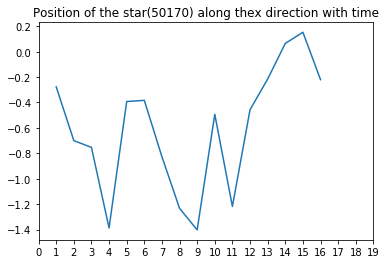

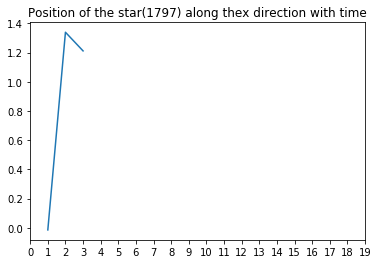

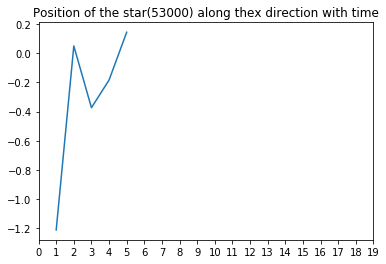

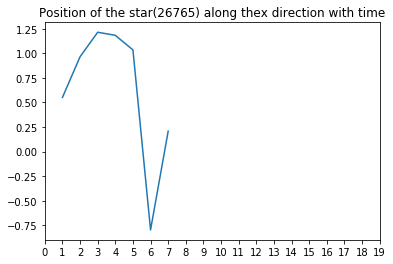

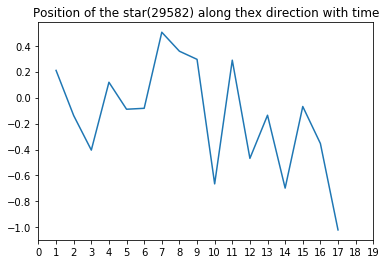

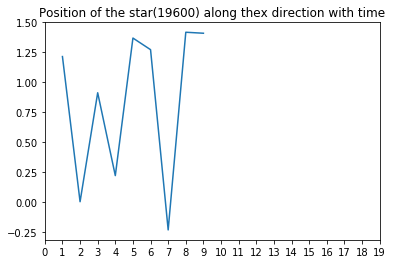

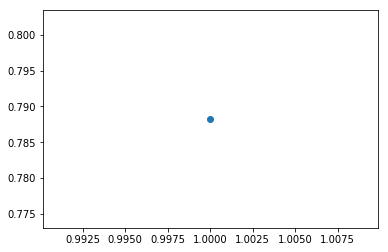

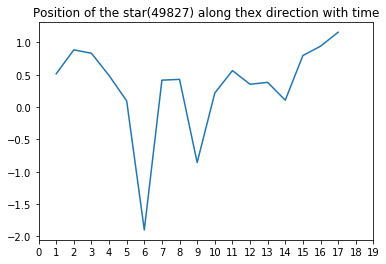

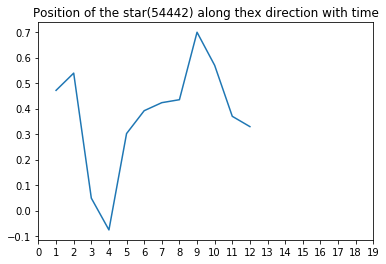

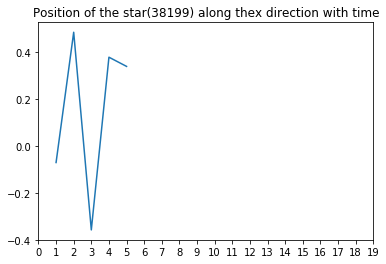

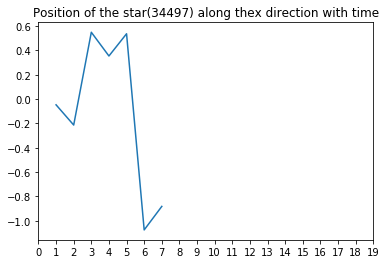

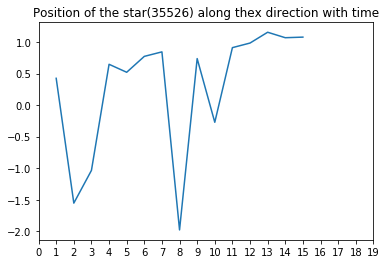

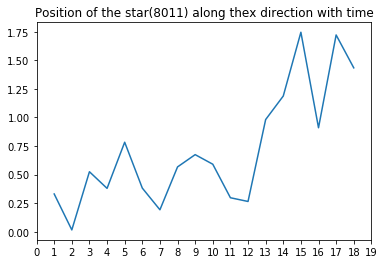

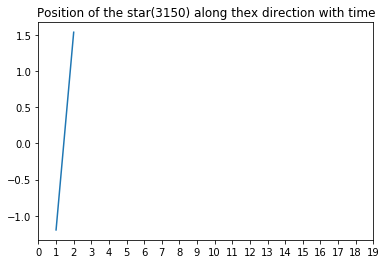

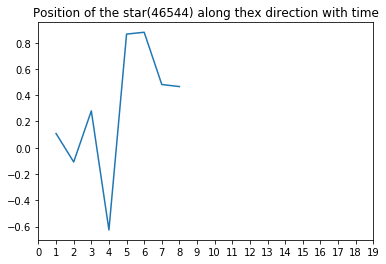

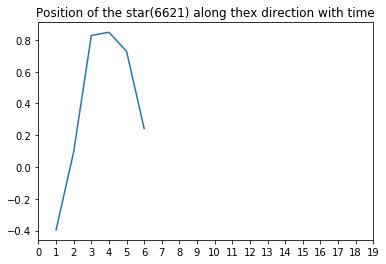

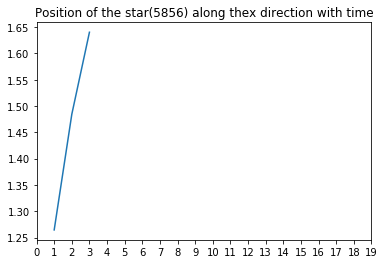

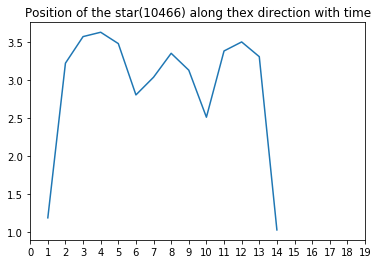

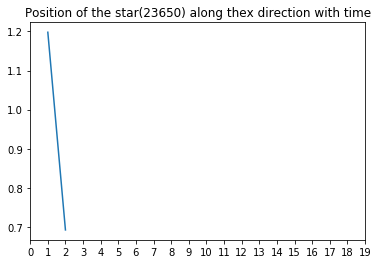

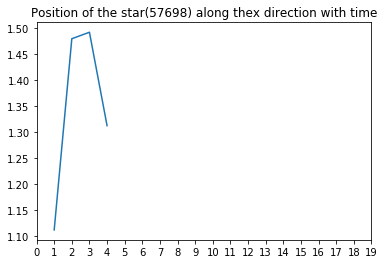

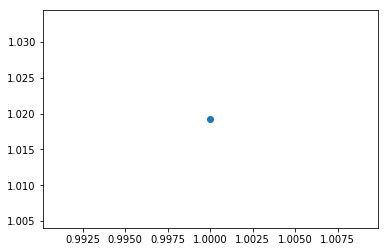

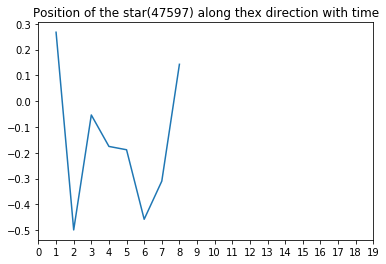

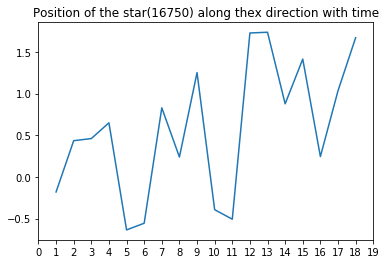

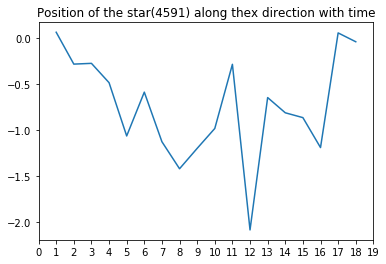

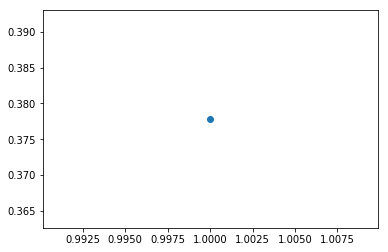

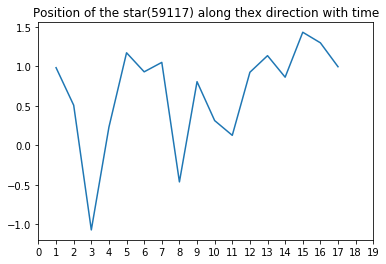

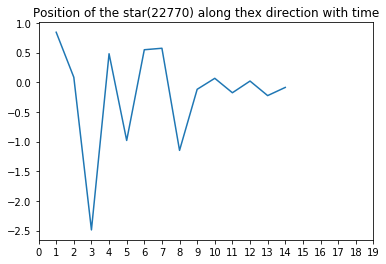

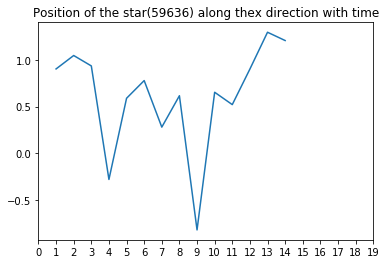

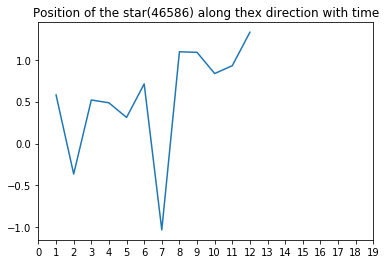

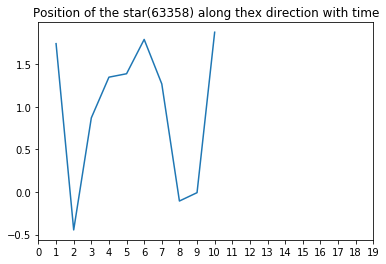

In [13]:
import math
def logt(y):
    new=[math.log(i) for i in y]
    return new

for i in all_points:
    y_coordinates=list(((all_points[i]['x']**2+all_points[i]['y']**2+all_points[i]['z']**2)**0.5))
    x_coordinates=list(all_points[i]['date'])
    y_coordinates=logt(y_coordinates)
    #print(x_coordinates,y_coordinates)
    plot_graph(x_coordinates,y_coordinates,i,'x')

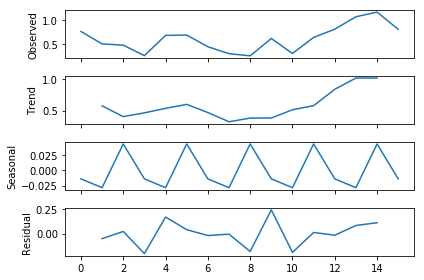

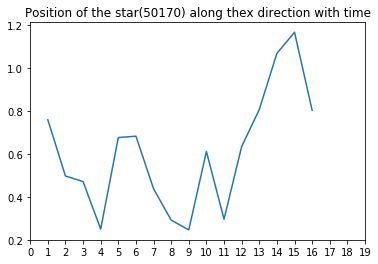

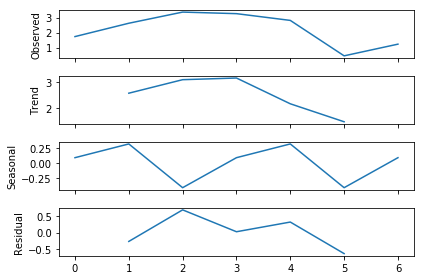

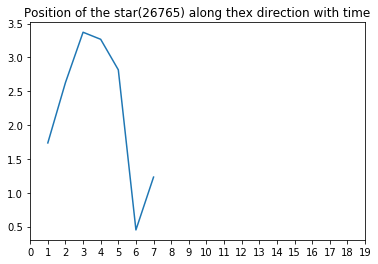

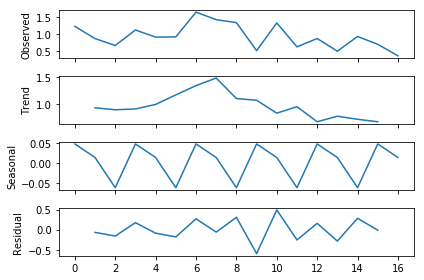

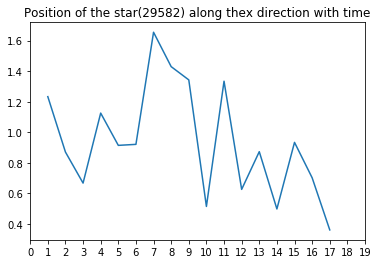

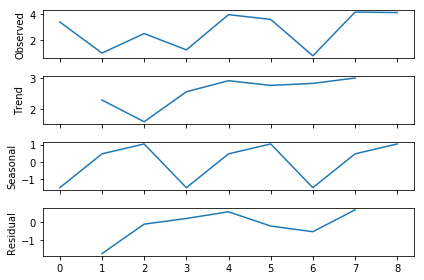

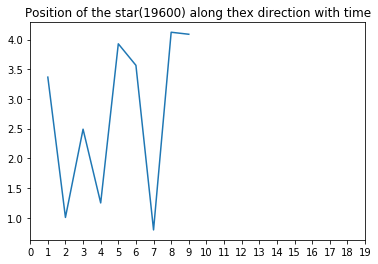

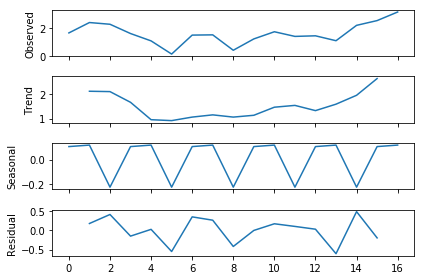

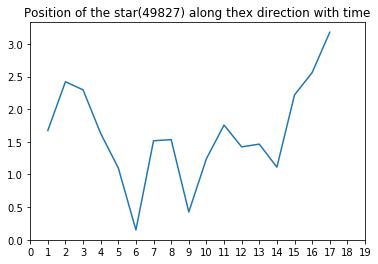

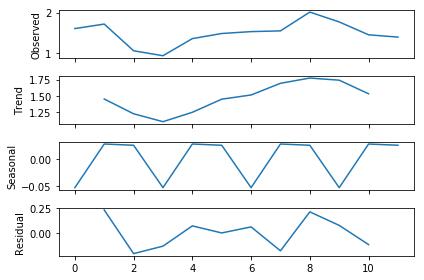

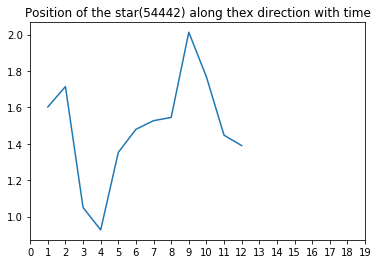

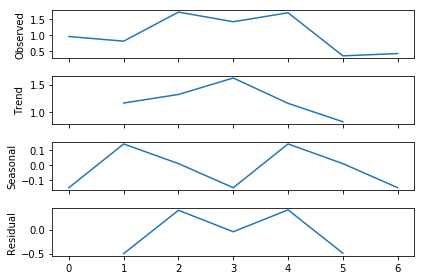

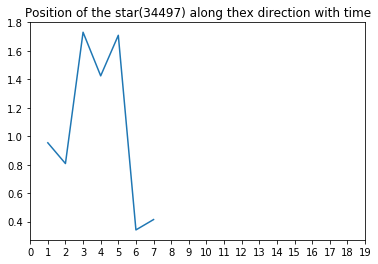

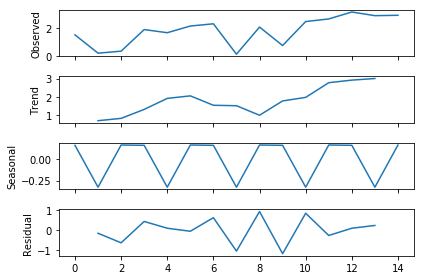

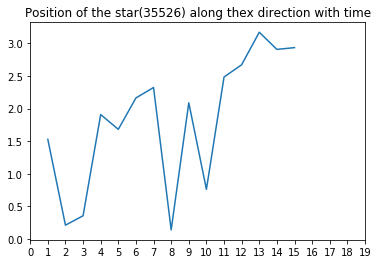

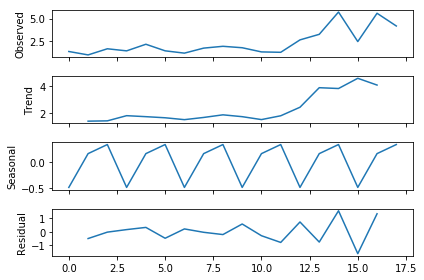

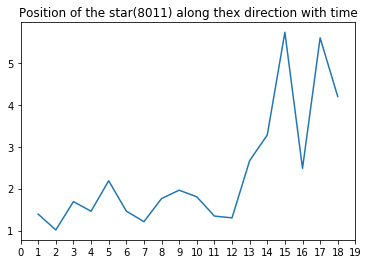

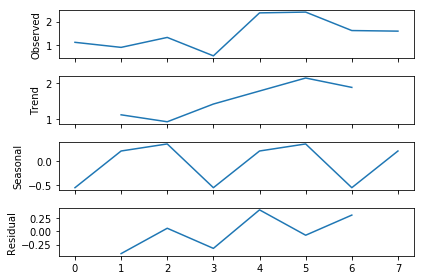

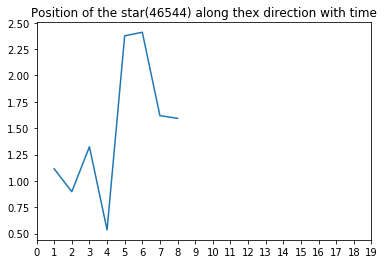

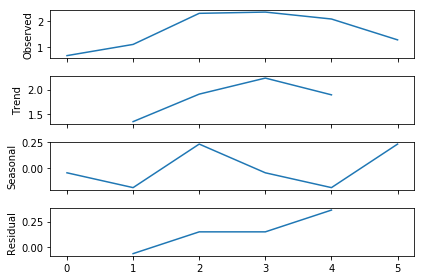

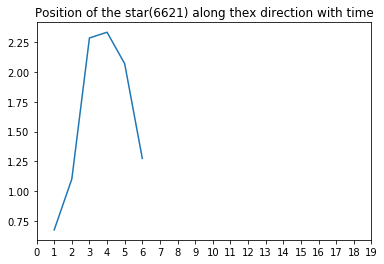

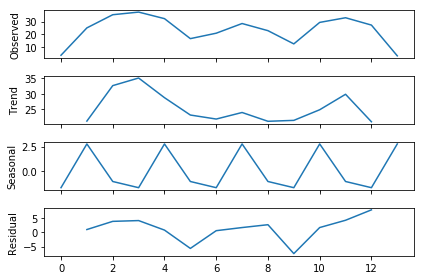

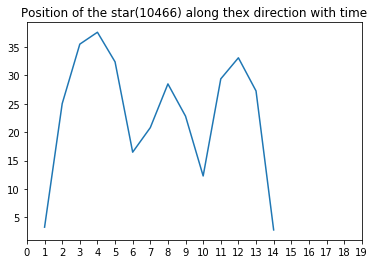

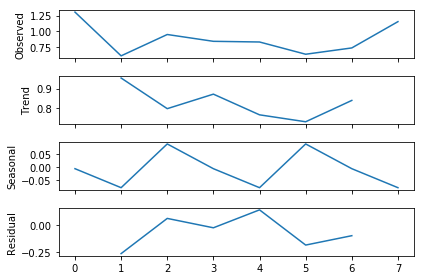

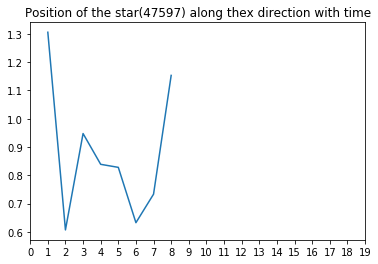

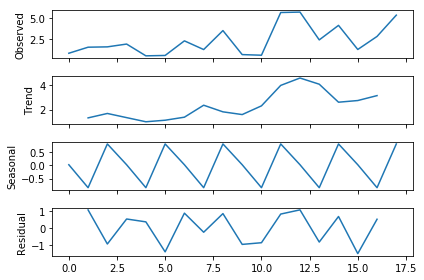

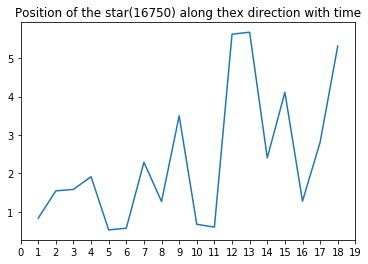

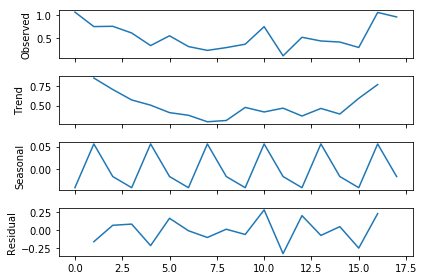

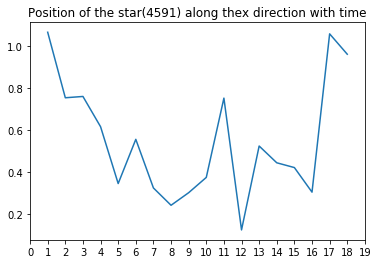

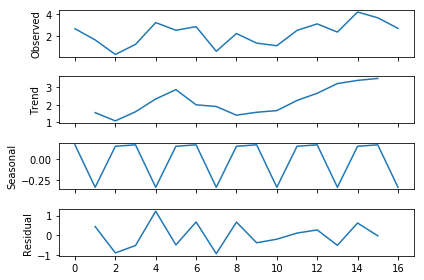

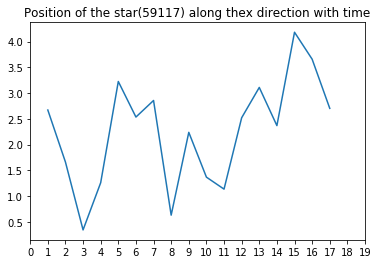

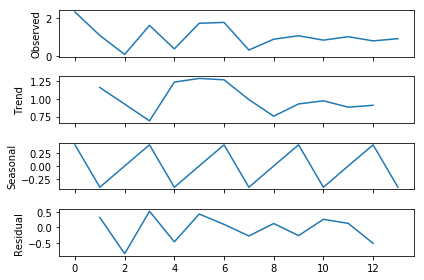

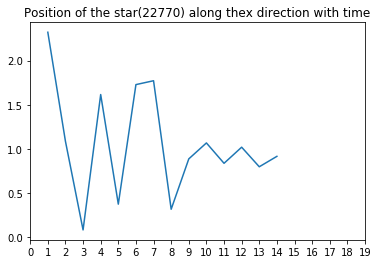

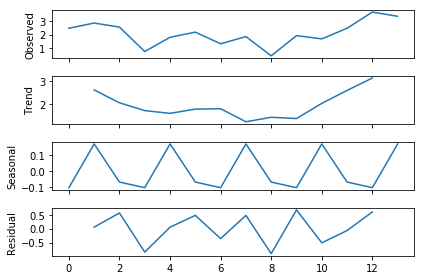

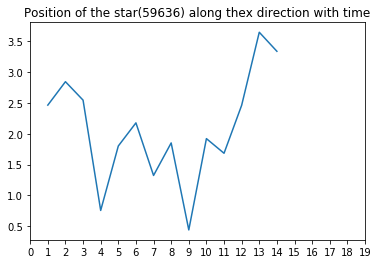

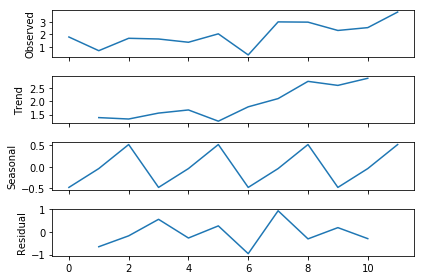

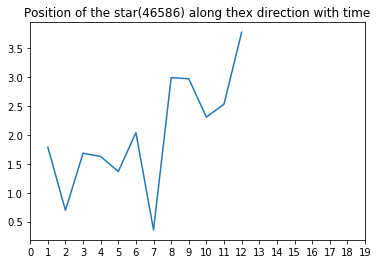

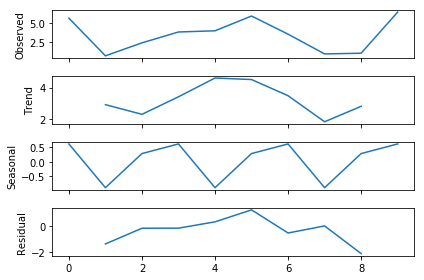

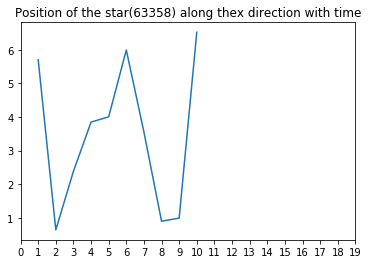

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

for i in all_points:
    y_coordinates=list(((all_points[i]['x']**2+all_points[i]['y']**2+all_points[i]['z']**2)**0.5))
    x_coordinates=list(all_points[i]['date'])
    y_coordinates=pd.Series(y_coordinates)
    if(len(y_coordinates)>5):
        result = seasonal_decompose(y_coordinates, model='additive',freq=3)
        result.plot()
        plt.show()
        plot_graph(x_coordinates,y_coordinates,i,'x')

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import warnings
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
warnings.filterwarnings('ignore')
for i in all_points:
    y_coordinates=list(((all_points[i]['x']**2+all_points[i]['y']**2+all_points[i]['z']**2)**0.5))
    x_coordinates=list(all_points[i]['date'])
    y_coordinates=pd.Series(y_coordinates)
    if(len(y_coordinates)>5):
        print('For the star:', i)
        result = seasonal_decompose(y_coordinates, model='additive',freq=3)
        pyplot.figure()
        plot_acf(y_coordinates-result.seasonal,ax=pyplot.gca())
        pyplot.show()
        plot_pacf(y_coordinates-result.seasonal, ax=pyplot.gca())
        pyplot.show()
        print('\n\n\n')

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
actual=[]
predicted=[]
for i in all_points:
    y_coordinates=list(((all_points[i]['x']**2+all_points[i]['y']**2+all_points[i]['z']**2)**0.5))
    x_coordinates=list(all_points[i]['date'])
    y_coordinates=pd.Series(y_coordinates)
    if(len(y_coordinates)>5):
        print(y_coordinates.index[-1])
        model = ARIMA(y_coordinates[:-1], order=(0,1,1))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast(steps=1)
        yhat = output[0]
        obs=y_coordinates[y_coordinates.index[-1]]
        print('predicted=%f, expected=%f' % (yhat, obs))
        actual.append(obs)
        predicted.append(yhat)
        print(model_fit.summary())
        # plot residual errors
        residuals = pd.DataFrame(model_fit.resid)
        print('Residual')
        residuals.plot()
        pyplot.show()
        print('The density plot of the residual error')
        residuals.plot(kind='kde')
        pyplot.show()
        print(residuals.describe())
        print('\n\n\n\n\n')
print(len(predicted),len(actual))
print(mean_squared_error(predicted,actual))

### This notebook implements an Arima Model to predict the position of the star at the test data i.e. the last data point( time:19) for all those stars that leave the cluster.  An Arima Model with p,d,q as 0,1,1 was built. The integrator d was 1 because it was clearly seen from the augmented dickey fuller test that all the data points for these stars are not stationary. Based on the ACF and the PACF curves of the stars, the values for p and q were found. When constructing this arima model, We observe that that most of the points are close to the one that is predicted at the final position with few exception. Overall this model is not useful since the number of time series values is just 18 at maximum(These stars don't appear in the final test data set). Since capturing the change in the position of the cluster happens very rarely(sometimes after 1000-10000 years), the number of distinct time components is smaller and the change is very minimal.

# Repeating the above method for sample of the cluster that do not leave the cluster to check stationarity

In [ ]:
print(*stars_that_left)

In [ ]:
ids=[i for i in range(1,20)]# taking the first 50 stars

In [ ]:
non_leaving=dict()
for i in ids:
    non_leaving[i]=df_all[df_all.iloc[:,7]==i]


In [ ]:
def plot_graph(x_coordinates,y_coordinates,i,j):
    if(len(x_coordinates)==1):
        plt.scatter(x_coordinates,y_coordinates)
        plt.show()
    else:
        plt.plot(x_coordinates,y_coordinates)
        plt.title('Position of the star('+str(i)+') along the'+str(j)+' direction with time')
        plt.xticks([i for i in range(20)])
        plt.show()
for i in non_leaving:
    y_coordinates=list(((non_leaving[i]['x']**2+non_leaving[i]['y']**2+non_leaving[i]['z']**2)**0.5))
    x_coordinates=list(non_leaving[i]['date'])
    plot_graph(x_coordinates,y_coordinates,i,'x')

In [ ]:
from statsmodels.tsa.stattools import adfuller
for i in non_leaving:
    y_coordinates=list(((non_leaving[i]['x']**2+non_leaving[i]['y']**2+non_leaving[i]['z']**2)**0.5))
    x_coordinates=list(non_leaving[i]['date'])
    if(len(y_coordinates)>9):
        result = adfuller(y_coordinates)
        print('Star id: ',i)
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))
        print('\n\n\n\n')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

for i in non_leaving:
    y_coordinates=list(((non_leaving[i]['x']**2+non_leaving[i]['y']**2+non_leaving[i]['z']**2)**0.5))
    x_coordinates=list(non_leaving[i]['date'])
    y_coordinates=pd.Series(y_coordinates)
    if(len(y_coordinates)>5):
        result = seasonal_decompose(y_coordinates, model='additive',freq=3)
        result.plot()
        plt.show()
        plot_graph(x_coordinates,y_coordinates,i,'x')

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import warnings
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
warnings.filterwarnings('ignore')
for i in non_leaving:
    y_coordinates=list(((non_leaving[i]['x']**2+non_leaving[i]['y']**2+non_leaving[i]['z']**2)**0.5))
    x_coordinates=list(non_leaving[i]['date'])
    y_coordinates=pd.Series(y_coordinates)
    if(len(y_coordinates)>5):
        print('For the star:', i)
        result = seasonal_decompose(y_coordinates, model='additive',freq=3)
        pyplot.figure()
        plot_acf(y_coordinates-result.seasonal,ax=pyplot.gca())
        pyplot.show()
        plot_pacf(y_coordinates-result.seasonal, ax=pyplot.gca())
        pyplot.show()
        print('\n\n\n\n\n')

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
predicted=[]
actual=[]
    
for i in non_leaving:
    y_coordinates=list(((non_leaving[i]['x']**2+non_leaving[i]['y']**2+non_leaving[i]['z']**2)**0.5))
    x_coordinates=list(non_leaving[i]['date'])
    y_coordinates=pd.Series(y_coordinates)
    if(len(y_coordinates)>5):
        print(y_coordinates.index[-1])
        model = ARIMA(y_coordinates[:-1], order=(0,1,1))
        model_fit = model.fit(disp=0)
        
        output = model_fit.forecast(steps=1)
        yhat = output[0]
        obs=y_coordinates[y_coordinates.index[-1]]
        actual.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
        predicted.append(yhat)
        print(model_fit.summary())
        # plot residual errors
        residuals = pd.DataFrame(model_fit.resid)
        print('Residual')
        residuals.plot()
        pyplot.show()
        print('The density plot of the residual error')
        residuals.plot(kind='kde')
        pyplot.show()
        print(residuals.describe())
        print('\n\n')
print(len(actual),len(predicted))
print('Mean squared error is:',mean_squared_error(actual,predicted))

## Compared to the stars that leave the cluster, the ARIMA(0,1,1) performed better for stars that were still in the cluster. This is because, the number of points for the arima model is 19 compared to those that left the cluster which could have the number of timestamps as low as 1. The residual plots for the density is also normal indicating the error is not dependent of the input. 
### But trying to model a arima model for every single star cluster for 19 timestamps is slower since the model has to do for 64000 points. The notebook does for 20 points as an example and displays the mean squared error for the same. Even though the mean squared error is lesser than the regression model that was constructed, the model is not practical